# Google PlayeStore Data
### Complete Explotary Data Analysis Beginner to Advance

Dataset Source [Link](https://www.kaggle.com/lava18/google-play-store-apps)

* `Context:` While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

* `Content:` Each app (row) has values for catergory, rating, size, and more.

* `Acknowledgements:` This information is scraped from the Google Play Store. This app information would not be available without it.

* `Inspiration:`
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

## 1. Importing Libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling as yd
%matplotlib inline


## 2. Data Loading and Exploration | Cleaning

- lets upload tha dataset

In [59]:
df = pd.read_csv("./DataSets/googleplaystore.csv")


`Imporatent Thing`
- Set options to be maximum for columns and rows
- Warnings Hide/Ignore to looks clean notebook

In [60]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Hide warnings in your notebook
import warnings
warnings.filterwarnings("ignore")

- Let's have a look on top 5 rows of the data.

In [61]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [62]:
# check how many columns 
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [63]:
# Check how many rows and columns shape.
# df.shape
print(f'in this dataset we have total {df.shape[0]} rows, and total {df.shape[1]} columns.')

in this dataset we have total 10841 rows, and total 13 columns.


In [64]:
# Check the dafa informetion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [65]:
# lets describe tha data in details
df.describe()

,Rating,Reviews
count,9367.000000,1.084100e+04
mean,4.191513,4.441119e+05
std,0.515735,2.927629e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.476800e+04
max,5.000000,7.815831e+07


### We have total 5 columns of numeric formate 'Rating', 'Reviews', 'Size', 'Installs' and 'Price'.
### lets convert into numeric catagory

In [66]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

**Observation**
1. Varies with device
2. M
3. k

In [67]:
# check missing values in whole data or in any particular column
df.isnull().sum()
df['Size'].isnull().sum()

np.int64(0)

- We have 0 missing value in ''Size' series lets move farword

In [68]:
# find the value 'M' in size column
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

np.int64(8830)

In [69]:
# find the value 'k' in size column
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

np.int64(316)

In [70]:
# find the value 'Varies with device' in size column
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

np.int64(1695)

In [71]:
# counts these output values
8830+316+1695

10841

In [72]:
# total legnth of Size variable
len(df['Size'])

10841

- lets convert column 'Size' into Bytes

In [73]:
# lets define a function for converting str into int
def convert_size(size):
    if isinstance(size, str):
        if 'k' in size:
            return float(size.replace('k', '')) * 1024
        elif 'M' in size:
            return float(size.replace('M', '')) * 1024 * 1024
        elif 'Varies with device' in size:
            return np.nan
    return size

In [74]:
# lets apply the function
df['Size'] = df['Size'].apply(convert_size)
df['Size'].unique()

array([1.99229440e+07, 1.46800640e+07, 9.12261120e+06, 2.62144000e+07,
       2.93601280e+06, 5.87202560e+06, 3.04087040e+07, 3.46030080e+07,
       3.25058560e+06, 2.93601280e+07, 1.25829120e+07, 2.09715200e+07,
       2.20200960e+07, 3.87973120e+07, 2.83115520e+06, 5.76716800e+06,
       1.78257920e+07, 4.08944640e+07, 3.25058560e+07, 4.40401920e+06,
       7.34003200e+06, 2.41172480e+07, 6.29145600e+06, 6.39631360e+06,
       4.82344960e+06, 9.64689920e+06, 5.45259520e+06, 1.15343360e+07,
       2.51658240e+07,            nan, 9.85661440e+06, 1.57286400e+07,
       1.04857600e+07, 1.25829120e+06, 2.72629760e+07, 8.38860800e+06,
       8.28375040e+06, 5.87202560e+07, 5.97688320e+07, 3.67001600e+07,
       5.66231040e+07, 2.05824000e+05, 3.77487360e+06, 5.97688320e+06,
       9.01775360e+06, 2.51658240e+06, 2.83115520e+07, 2.62144000e+06,
       1.67772160e+07, 3.56515840e+06, 9.33232640e+06, 4.08944640e+06,
       3.04087040e+06, 3.98458880e+07, 3.35544320e+07, 5.66231040e+06,
      

In [75]:
# rename the column
df.rename(columns={'Size': 'Size_in_Bytes'}, inplace=True)
df.head()


,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


- lets rename again using lambda function

In [76]:
# create a new column with name of Size_in_Mb
df['Size_in_Mb'] = df['Size_in_Bytes'].apply(lambda x: x /(1024* 1024))

# create a new column with name of Size_in_kb
df['Size_in_Kb'] = df['Size_in_Bytes'].apply(lambda x: x /(1024))
df.head()

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_Kb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,19456.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,14336.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,8908.8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,25600.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,2867.2


### Lets feature engneering of 'Installs' columns

In [77]:
# find unique values
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [78]:
# value counts check
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             908
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [79]:
# check missing values
df['Installs'].isnull().sum()

np.int64(0)

We have to remove + sign and comma ',' and we will convert **installs** column into integer
- 1. remove + sign
- 2. remove ',' comma
- 3. convert this column into integer

In [80]:
# remove + sign from column Installs
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '')if '+' in str(x) else x)
# df.head()

In [81]:
# remove ',' from column Installs
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '')if ',' in str(x) else x)


In [82]:
df['Installs'].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           908
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: count, dtype: int64

In [83]:
# convert to int
df['Installs'] = df['Installs'].apply(lambda x: int(x))
df['Installs'].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           908
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: count, dtype: int64

In [84]:
df.describe()

,Rating,Reviews,Size_in_Bytes,Installs,Size_in_Mb,Size_in_Kb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,9146.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,21.514141,22030.480308
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,22.588679,23130.807322
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.008301,8.500000
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,4.900000,5017.600000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,13.000000,13312.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,30.000000,30720.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,100.000000,102400.000000


## Feature Engneering of Price Column

In [89]:
# lets see how many values have $ in them
df['Price'].loc[df['Price'].str.contains('\$')].value_counts().sum()

np.int64(800)

In [90]:
df['Price'].loc[df['Price'].str.contains('0') & (~df['Price'].str.contains('\$'))].value_counts().sum()

np.int64(10041)

In [96]:
# remove $ sign
df['Price'] = df['Price'].apply(lambda x: x.replace('$', '')if '$' in str(x) else x)

In [97]:
df['Price'].value_counts()

Price
0         10041
0.99        148
2.99        129
1.99         73
4.99         72
3.99         63
1.49         46
5.99         30
2.49         26
9.99         21
6.99         13
399.99       12
14.99        11
4.49          9
29.99         7
24.99         7
3.49          7
7.99          7
5.49          6
19.99         6
11.99         5
6.49          5
12.99         5
8.99          5
10.00         3
16.99         3
1.00          3
2.00          3
13.99         2
8.49          2
17.99         2
1.70          2
3.95          2
79.99         2
7.49          2
9.00          2
10.99         2
39.99         2
33.99         2
1.96          1
19.40         1
4.80          1
3.28          1
4.59          1
15.46         1
3.04          1
4.29          1
2.60          1
2.59          1
3.90          1
154.99        1
4.60          1
28.99         1
2.95          1
2.90          1
1.97          1
200.00        1
89.99         1
2.56          1
1.20          1
1.26          1
30.99         1
3.

In [98]:
# convetrt Price veriable into numaric values
df['Price'] = df['Price'].apply(lambda x: float(x))
df['Price'].value_counts()

Price
0.00      10041
0.99        148
2.99        129
1.99         73
4.99         72
3.99         63
1.49         46
5.99         30
2.49         26
9.99         21
6.99         13
399.99       12
14.99        11
4.49          9
29.99         7
24.99         7
3.49          7
7.99          7
5.49          6
19.99         6
11.99         5
6.49          5
12.99         5
8.99          5
10.00         3
16.99         3
1.00          3
2.00          3
13.99         2
8.49          2
17.99         2
1.70          2
3.95          2
79.99         2
7.49          2
9.00          2
10.99         2
39.99         2
33.99         2
1.96          1
19.40         1
4.80          1
3.28          1
4.59          1
15.46         1
3.04          1
4.29          1
2.60          1
2.59          1
3.90          1
154.99        1
4.60          1
28.99         1
2.95          1
2.90          1
1.97          1
200.00        1
89.99         1
2.56          1
1.20          1
1.26          1
30.99         1
3.

In [99]:
# using f string to print the result
print(f"the minimum price is {df['Price'].min()}")
print(f"and the maximum price is {df['Price'].max()}")
print(f"and the average price is {df['Price'].mean()}")

the minimum price is 0.0
and the maximum price is 400.0
and the average price is 1.0272733142699015


In [100]:
# find the missing values in desending order
df.isnull().sum().sort_values(ascending=False)

Size_in_Bytes     1695
Size_in_Mb        1695
Size_in_Kb        1695
Rating            1474
Current Ver          8
Android Ver          2
Type                 1
App                  0
Category             0
Reviews              0
Installs             0
Price                0
Content Rating       0
Genres               0
Last Updated         0
dtype: int64

In [102]:
# finding missing values percentage in the data
round(df.isnull().sum() * 100 / len(df), 2).sort_values(ascending=False)

Size_in_Bytes     15.64
Size_in_Mb        15.64
Size_in_Kb        15.64
Rating            13.60
Current Ver        0.07
Android Ver        0.02
Type               0.01
App                0.00
Category           0.00
Reviews            0.00
Installs           0.00
Price              0.00
Content Rating     0.00
Genres             0.00
Last Updated       0.00
dtype: float64

In [104]:
# Find total number of missing values
df.isnull().sum().sum()

np.int64(6570)

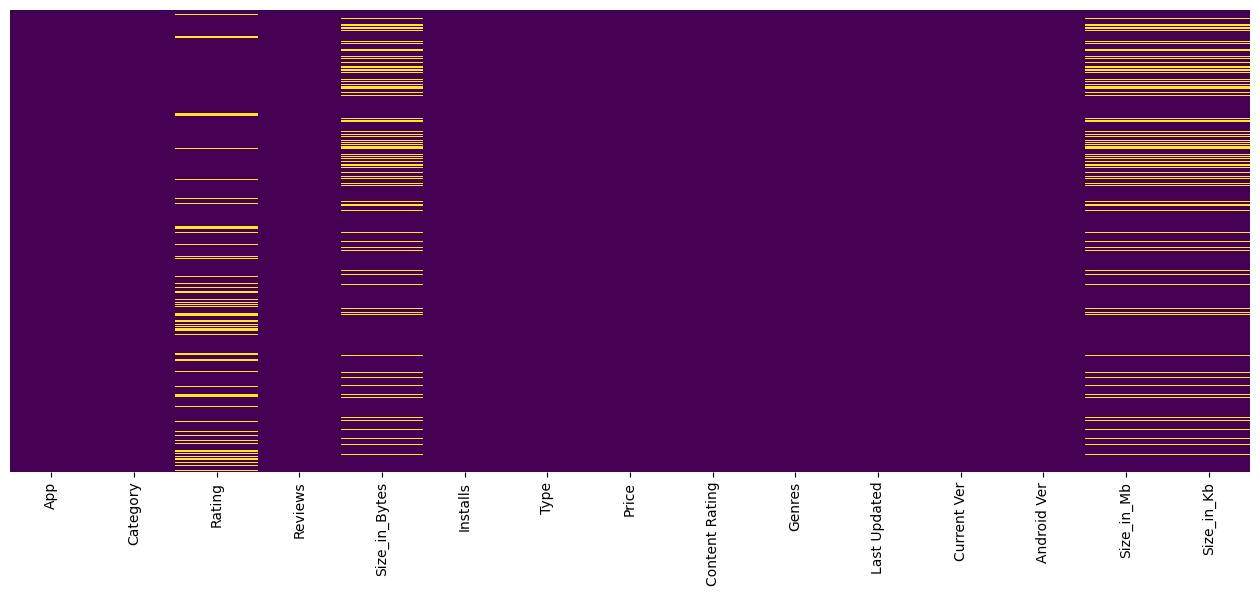

In [ ]:
# check the distribution of missing values by plotting a heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

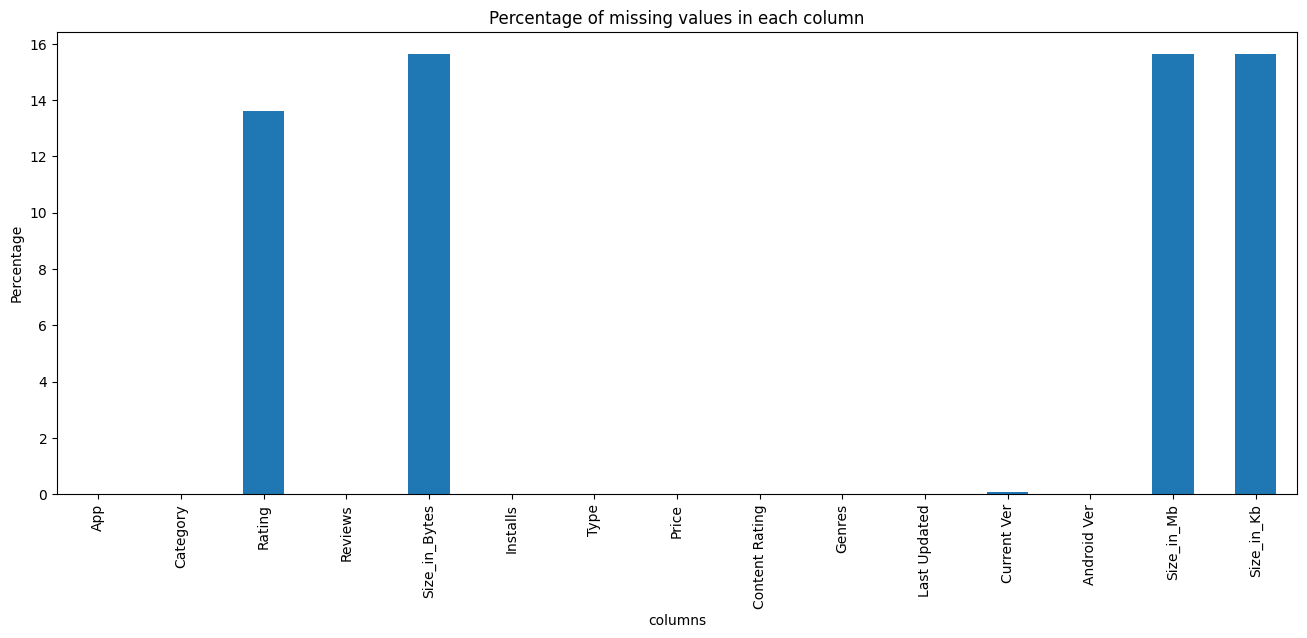

In [107]:
# make figure size
plt.figure(figsize=(16, 6))
# plot the null values by their percentage in each column
missing_percentage = df.isnull().sum()/len(df) * 100
missing_percentage.plot(kind='bar')
# add the label
plt.xlabel("columns")
plt.ylabel("Percentage")
plt.title("Percentage of missing values in each column")
plt.show()